<a href="https://colab.research.google.com/drive/1V_zafYF9UP5akoWVOyflqVA6oPDkc7Kk">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

#$Imports$ & $Data$

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.losses import sparse_categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt

In [9]:
(X_train,Y_train), (X_test,Y_test) = keras.datasets.cifar10.load_data()
X_train = X_train/255.0
X_test = X_test / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
np.bincount(np.array(Y_train).reshape(50000)) # Checking for class imbalance

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])

In [12]:
X_valid = X_train[40000:]
Y_valid = Y_train[40000:]
X_train = X_train[:40000]
Y_train = Y_train[:40000]

In [13]:
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

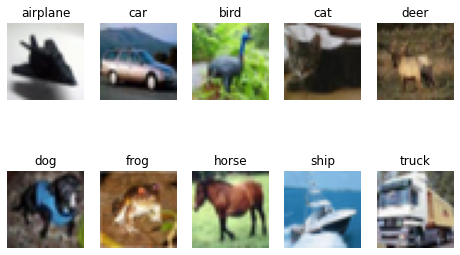

In [14]:
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5)
fig.set_figheight(5)
fig.set_figwidth(8)

ax1.imshow(np.array(X_train[29]).reshape(32,32,3),cmap="jet")
ax1.set_title(class_names[Y_train[29][0]])
ax1.axis("off")

ax2.imshow(np.array(X_train[4]).reshape(32,32,3),cmap="jet")
ax2.set_title(class_names[Y_train[4][0]])
ax2.axis("off")

ax3.imshow(np.array(X_train[6]).reshape(32,32,3),cmap="jet")
ax3.set_title(class_names[Y_train[6][0]])
ax3.axis("off")

ax4.imshow(np.array(X_train[9]).reshape(32,32,3),cmap="jet")
ax4.set_title(class_names[Y_train[9][0]])
ax4.axis("off")

ax5.imshow(np.array(X_train[3]).reshape(32,32,3),cmap="jet")
ax5.set_title(class_names[Y_train[3][0]])
ax5.axis("off")

ax6.imshow(np.array(X_train[27]).reshape(32,32,3),cmap="jet")
ax6.set_title(class_names[Y_train[27][0]])
ax6.axis("off")

ax7.imshow(np.array(X_train[0]).reshape(32,32,3),cmap="jet")
ax7.set_title(class_names[Y_train[0][0]])
ax7.axis("off")

ax8.imshow(np.array(X_train[7]).reshape(32,32,3),cmap="jet")
ax8.set_title(class_names[Y_train[7][0]])
ax8.axis("off")

ax9.imshow(np.array(X_train[8]).reshape(32,32,3),cmap="jet")
ax9.set_title(class_names[Y_train[8][0]])
ax9.axis("off")

ax10.imshow(np.array(X_train[1]).reshape(32,32,3),cmap="jet")
ax10.set_title(class_names[Y_train[1][0]])
ax10.axis("off")


plt.show()

#$LeNet$ $:$
> `The Start of Computer Vision`



---

The $LeNet$-$5$ `architecture` is perhaps the `most widely` known $CNN$ architecture. It was `created` by $Yann$ $LeCun$ in $1998$ and has been widely used for `handwritten digit recognition` $(MNIST)$. It is `composed` of the `layers` shown below :


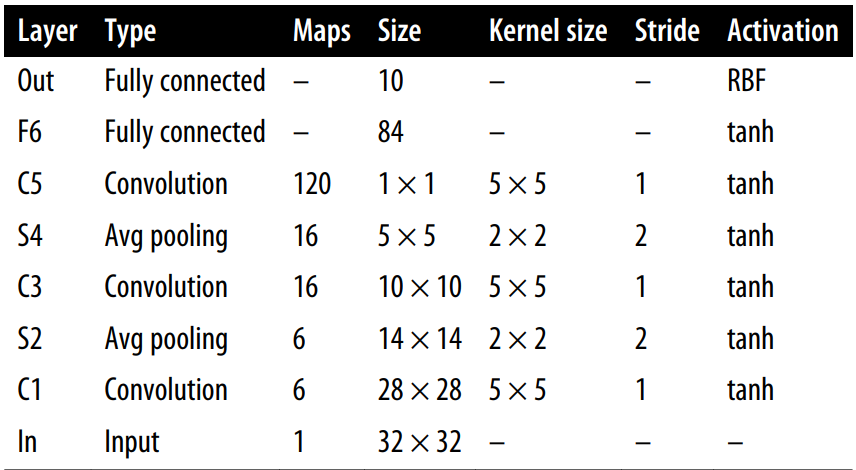


Few Details $:$

* $MNIST$ images are $28 × 28$ `pixels`, but they are `zero-padded` to $32 × 32$ `pixels` and `normalized` before being fed to the `network`. The `rest` of the `network` does `not use` any `padding`, which is why the `size` keeps `shrinking` as the `image progresses` through the `network`.

* The $average$ $pooling$ $layers$ are slightly more `complex` than usual $:$ each `neuron` computes the `mean` of its `inputs`, then `multiplies` the result by a `learnable coefficient` (one per map) and adds a `learnable bias term` (again, one per map), then finally applies the `activation function`.

* Most `neurons` in $C3$ `maps` are `connected` to `neurons` in `only three` or `four` $S2$ `maps` (instead of all six S2 maps).

* The `output layer` is a `bit special` $:$ instead of `computing` the `matrix multiplication` of the `inputs` and the `weight vector`, each `neuron outputs` the `square` of the `Euclidian distance` between its `input vector` and its `weight vector`. Each output measures how much the `image belongs` to a `particular digit class`. 

---
$Note$ $:$
* The $cross-entropy$ `cost function` is now `preferred`, as it `penalizes bad predictions` much more, producing `larger gradients` and `converging faster`.

* $ReLu$ is `preferred` over $tanh$ `activation function`, as it is much `faster` and helps make `better predictions` than $tanh$

---
$WebSite$ $:$

* $Yann$ $LeCun’s$ [website](http://yann.lecun.com/exdb/lenet/index.html) `features` great `demos` of $LeNet$-$5$ `classifying digits`.

---

#$AlexNet$ 
> `Advancing the Vision`



---
The $AlexNet$ $CNN$ `architecture` won the $2012$ $ImageNet$ $ILSVRC$ challenge by a `large margin` $:$ it achieved a `top-five error rate` of $17$%, while the `second best` achieved only $26$%!.

It was `developed` by $Alex$ $Krizhevsky$, $Ilya$ $Sutskever$, and $Geoffrey Hinton$. It is `similar` to $LeNet-5$, only `much larger` and `deeper`, and it was the `first` to `stack convolutional layers` directly on top of one another, instead of stacking a `pooling layer` on top of `each convolutional layer`. 

The `architecture` is `represented` below $:$

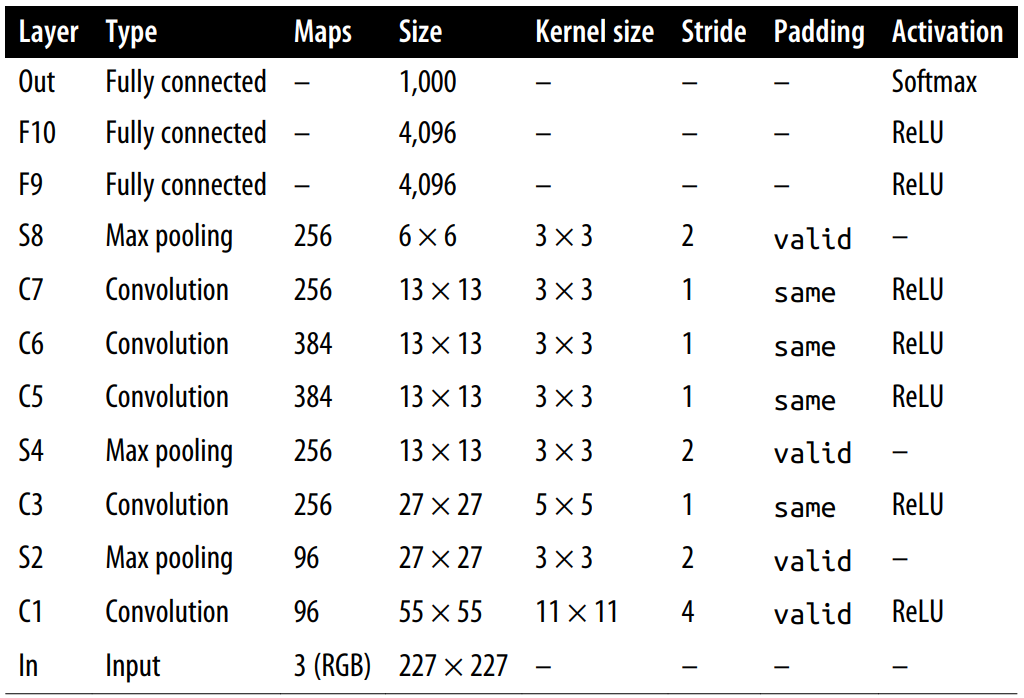



---
$Important$ $Details$ $:$

> `Getting Insights of Model`

* This showed that using `large kernel size` and `strides` in the `Input Layer` reduces the `spatial dimensions` while `preserving` the `features`.

* The $Input$ $ConvLayers$ contains $Valid$ $Padding$ (i.e `Padding with Zeros`)

* With $MaxPooling$ $Layers$ `valid` padding is used.

* For $MaxPooling$ $Layers$ the `strides` are `larger` than that of the $Convolutional$ $Layers$, this indicated the `shrinking` of the `feature maps`.

* The Number of $Feature Maps$ follows a `trend` of `Increasing` and finally `decreasinf` the last $Conv Layer$.

* Authors `introduced` $DropOut$ $layers$, $Data$ $Augmentation$ and $LRN$ for `better generalization`.

----

To `reduce overfitting`, the `authors` used `two regularization techniques`. 

* First, they `applied` $Dropout$ with a $50$% `dropout rate` during training to the `outputs` of `layers` $F9$ and $F10$.

* Second, they performed `data augmentation` by `randomly shifting` the `training images` by various `offsets`, `flipping` them `horizontally`,
and changing the `lighting conditions`.

> $AlexNet$ also uses a `competitive normalization` step `immediately` after the $ReLU$ step of layers $C1$ and $C3$, called $Local$ $Response$ $Normalization$ $(LRN)$ $:$ 

* The most `strongly activated neurons` inhibit other `neurons` located at the `same position` in neighboring `feature maps` (such competitive activation has been observed in biological neurons). 

* This `encourages` different `feature maps` to `specialize`, pushing them apart and `forcing` them to `explore` a `wider range` of `features`, ultimately `improving generalization`.

> In $AlexNet$, the `hyperparameters` are set as `follows` $:$ $r = 2$(`depth radius`), $α = 0.00002$, $β = 0.75$, and
$k = 1$(`bias`). This step can be `implemented` using the `tf.nn.local_response_normalization()` function.

----

A `variant` of $AlexNet$ called $ZF$ $Net$ was `developed` by $Matthew Zeiler$ and $Rob Fergus$ and won the $2013$ $ILSVRC$ $challenge$. It is `essentially` $AlexNet$ with a `few tweaked hyperparameters` (number of `feature maps`, `kernel size`, `stride`, etc.).

---


In [ ]:
def process_images(image, label):
    # Resize images from 32x32 to 227x227
    image = tf.image.resize(image, (227,227))
    return image, label

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,Y_train))
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,Y_valid))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,Y_test))

In [ ]:
train_ds = train_ds.map(process_images).shuffle(10000).batch(32,drop_remainder=True).prefetch(1)
valid_ds = valid_ds.map(process_images).shuffle(10000).batch(32,drop_remainder=True).prefetch(1)
test_ds = test_ds.map(process_images).shuffle(10000).batch(32,drop_remainder=True).prefetch(1)

In [ ]:
AlexNet = Sequential([
                      layers.Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation="relu",kernel_initializer="he_normal",input_shape=(227,227,3)),
                      layers.BatchNormalization(),
                      layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                      layers.Conv2D(filters=256,kernel_size=5,strides=1,padding="same",activation="relu",kernel_initializer="he_normal"),
                      layers.BatchNormalization(),
                      layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
                      layers.Conv2D(filters=384,kernel_size=3,strides=1,padding="same",activation="relu",kernel_initializer="he_normal"),
                      layers.BatchNormalization(),
                      layers.Conv2D(filters=384,kernel_size=3,strides=1,padding="same",activation="relu",kernel_initializer="he_normal"),
                      layers.BatchNormalization(),
                      layers.Conv2D(filters=256,kernel_size=3,strides=1,padding="same",activation="relu",kernel_initializer="he_normal"),
                      layers.BatchNormalization(),
                      layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
                      layers.Flatten(),
                      layers.Dense(4096,activation="relu",kernel_initializer="he_normal"),
                      layers.Dropout(0.5),
                      layers.Dense(4096,activation="relu",kernel_initializer="he_normal"),
                      layers.Dropout(0.5),
                      layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal"),
])

$LRN$ are `not widely` utilized in `modern CNN architectures`, as there are `other` more `effective methods` of `normalization`.

In [ ]:
AlexNet.compile(
    loss  = sparse_categorical_crossentropy,
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
# AlexNet.fit(
#     train_ds,
#     validation_data = valid_ds,
#     epochs=100,
#     callbacks = [keras.callbacks.EarlyStopping(patience=3)]
# )
# # Run only if you have strong GPU/TPU to handel it.

#$ZF-Net$
> `Perfecting Model`


---
$ZFNet$ is a `classic convolutional neural network`. The design was `motivated` by visualizing `intermediate feature layers` and the operation of the `classifier`. Compared to $AlexNet$, the `filter sizes` are `reduced` and the `stride` of the `convolutions` are `reduced`.

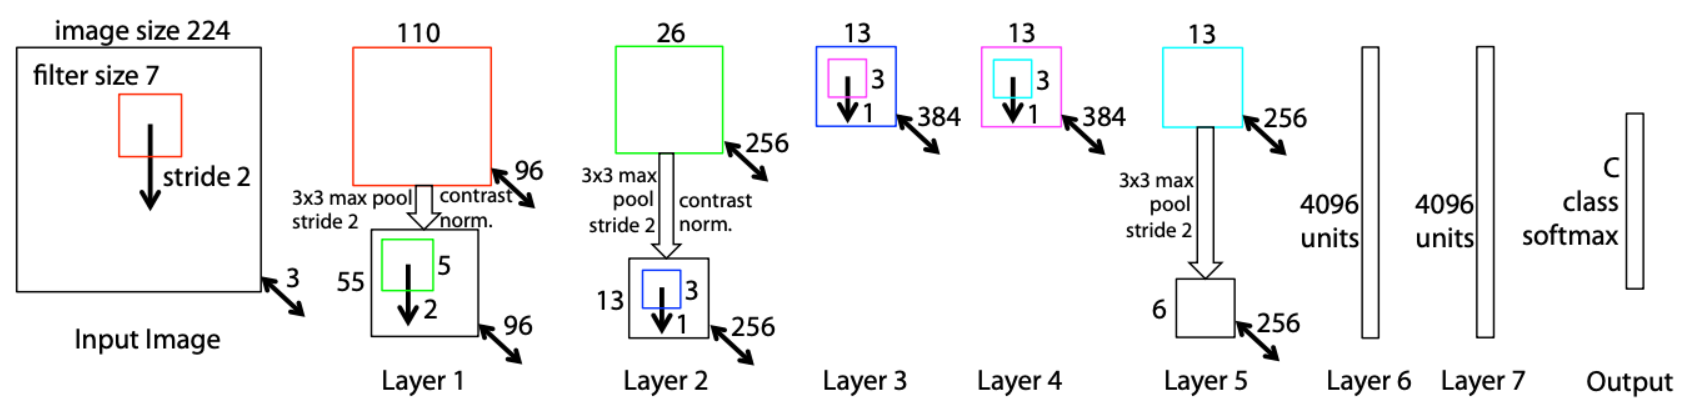




In [ ]:
def process_images(image, label):
    # Resize images from 32x32 to 224x224
    image = tf.image.resize(image, (224,224))
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((X_train,Y_train)).map(process_images).shuffle(10000).batch(32,drop_remainder=True).prefetch(1)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,Y_valid)).map(process_images).shuffle(10000).batch(32,drop_remainder=True).prefetch(1)
test_ds = tf.data.Dataset.from_tensor_slices((X_test,Y_test)).map(process_images).shuffle(10000).batch(32,drop_remainder=True).prefetch(1)

In [ ]:
ZFNet = Sequential([
                      layers.Conv2D(filters=96,kernel_size=(7,7),strides=(2,2),activation="relu",kernel_initializer="he_normal",input_shape=(224,224,3)),
                      layers.BatchNormalization(),
                      layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                      layers.Conv2D(filters=256,kernel_size=3,strides=1,padding="same",activation="relu",kernel_initializer="he_normal"),
                      layers.BatchNormalization(),
                      layers.MaxPool2D(pool_size=3,strides=1,padding='valid'),
                      layers.Conv2D(filters=384,kernel_size=3,strides=1,padding="same",activation="relu",kernel_initializer="he_normal"),
                      layers.Conv2D(filters=384,kernel_size=3,strides=1,padding="same",activation="relu",kernel_initializer="he_normal"),
                      layers.Conv2D(filters=256,kernel_size=3,strides=1,padding="same",activation="relu",kernel_initializer="he_normal"),
                      layers.BatchNormalization(),
                      layers.MaxPool2D(pool_size=3,strides=2,padding='valid'),
                      layers.Flatten(),
                      layers.Dense(4096,activation="relu",kernel_initializer="he_normal"),
                      layers.Dropout(0.5),
                      layers.Dense(4096,activation="relu",kernel_initializer="he_normal"),
                      layers.Dropout(0.5),
                      layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal"),
])

In [ ]:
ZFNet.compile(
    loss=sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
# ZFNet.fit(
#     train_ds,
#     epochs=50,
#     validation_data=valid_ds,
#     callbacks = [keras.callbacks.EarlyStopping(patience=3)]
# )
#  # Run only if you have good GPU/TPU

---
$IMP :$
* $ZFNet$ shows the `importance` of prameters like `kernel size` and `strides`.

----

#$GoogLeNet$
> `Steps of big companies`

---
The $GoogLeNet$ `architecture` was `developed` by $Christian$ $Szegedy$ $et$ $al$. from `Google` `Research`, and it won the $ILSVRC$ $2014$ `challenge` by pushing the `top-five error rate` below $7$%. This `great performance` came in `large part` from the `fact` that the `network` was `much deeper` than previous CNNs.

This was possible by `subnetworks` called $Inception$ $modules$, which allow $GoogLeNet$ to use `parameters` much `more efficiently` than `previous architectures` $:$ 

* $GoogLeNet$ actually has $10$ times `fewer parameters` than $AlexNet$ (roughly $6$ $million$ instead of $60$ $million$).

You may `wonder` why `inception modules` have `convolutional layers` with $1 × 1$ $kernels$. Surely these layers `cannot capture` any `features` because they look at only `one pixel` at a time? In fact, the `layers` serve `three purposes` $:$

* Although they `cannot capture spatial patterns`, they can `capture patterns` along the `depth dimension`.

* They are `configured` to `output fewer feature maps` than their inputs, so they `serve` as `bottleneck layers`, meaning they `reduce dimensionality`. This `cuts` the `computational cost` and the `number` of `parameters`, `speeding up training` and `improving generalization`.

* Each pair of `convolutional layers` ($[1 × 1, 3 × 3]$ and $[1 × 1, 5 × 5]$) acts like a `single powerful convolutional layer`, capable of capturing `more complex patterns`.

* Indeed, instead of `sweeping` a `simple linear classifier` across the `image` (as a `single convolutional layer does`), this pair of `convolutional layers` sweeps a `two-layer neural network` across the image.

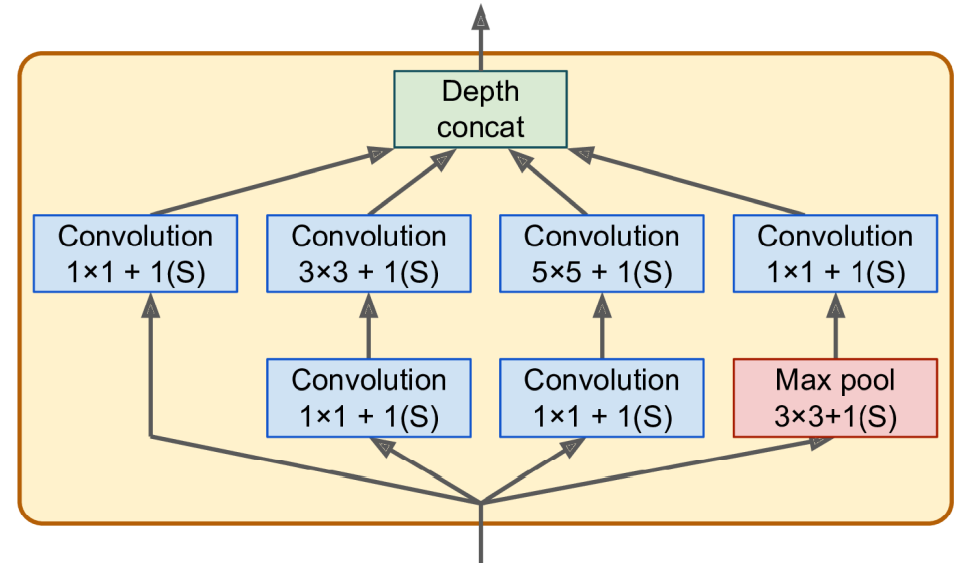

----

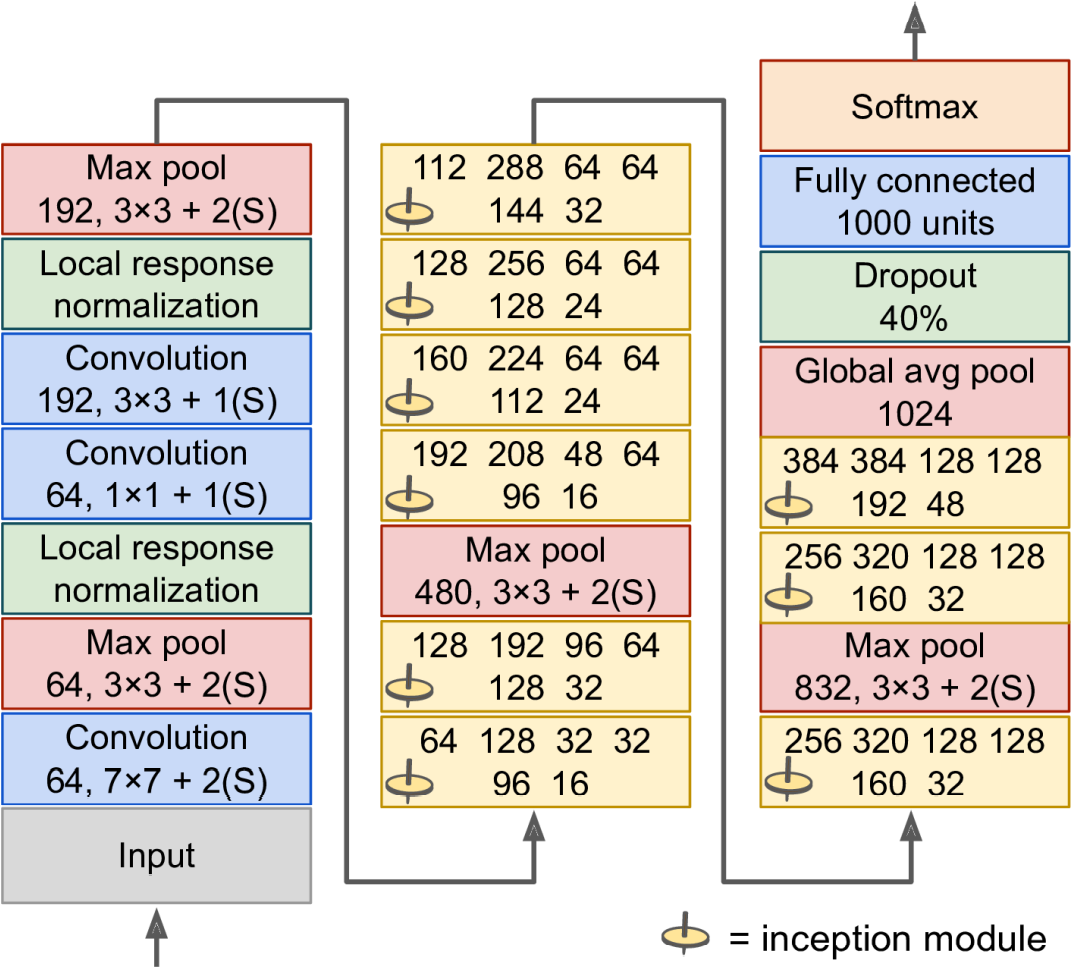

The $global$ $average$ $pooling$ $layer$ outputs the `mean` of each `feature map` $:$ this `drops` any remaining `spatial information`, which is fine because there was not much spatial information left at that point.

Indeed, $GoogLeNet$ input images are `typically expected` to be $224 × 224$ pixels, so after $5$ `max pooling layers`, each dividing the `height` and `width` by $2$, the `feature maps` are down to $7 × 7$.

Moreover, it is a `classification task`, not localization, so it `does not matter` where the `object is`. Thanks to the `dimensionality reduction` brought by this layer, there is `no need` to have `several fully connected layers` at the top of the $CNN$ (like in $AlexNet$), and this `considerably reduces` the `number of parameters` in the network and `limits` the `risk of overfitting`.

----
$Note :$

* This shows that, the `combination` of `layers` with $[1 × 1 + 1]$ $Conv$ $layer$ helps the `next layer` to learn `complex patterns` both in the `spatial dimensions` and the `depth dimensions`.

* $Conv$ $[1 × 1 + 1]$ layers `serves` as the `dimensionality reduction` layer and work as a `bottleneck layer`.

* $Global$ $Average$ $Pooling$ $Layer$ works better than a $MaxPooling$ $layer$. Using then for the `end` of the `CNN layers` helps a lot.






--- 

In [ ]:
def preprocess_images(image,label):
  image = tf.image.resize(image,(224,224))
  return image, label
train_ds = tf.data.Dataset.from_tensor_slices((X_train,Y_train)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)
test_ds = tf.data.Dataset.from_tensor_slices((X_test,Y_test)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,Y_valid)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)

In [ ]:
def InceptionModule(input_layer,f1,f2_conv1,f2_conv3,f3_conv1,f3_conv5,f4):
  path1 = layers.Conv2D(f1,kernel_size=1,strides=1,padding="same",activation="relu",kernel_initializer="he_normal")(input_layer)
  
  path2_1 = layers.Conv2D(f2_conv1,kernel_size=1,strides=1,padding="same",activation="relu",kernel_initializer="he_normal")(input_layer)
  path2_2 = layers.Conv2D(f2_conv3,kernel_size=3,strides=1,padding="same",activation="relu",kernel_initializer="he_normal")(path2_1)
  
  path3_1 = layers.Conv2D(f3_conv1,kernel_size=1,strides=1,padding="same",activation="relu",kernel_initializer="he_normal")(input_layer)
  path3_2 = layers.Conv2D(f3_conv5,kernel_size=5,strides=1,padding="same",activation="relu",kernel_initializer="he_normal")(path3_1)

  path4_1 = layers.MaxPool2D(pool_size=3,strides=1,padding="same")(input_layer)
  path4_2 = layers.Conv2D(f4,kernel_size=1,strides=1,padding="same",activation="relu",kernel_initializer="he_normal")(path4_1)

  Output = layers.Concatenate(axis=3)([path1,path2_2,path3_2,path4_2])
  return Output

In [ ]:
# GoogLeNet
InputLayer = layers.Input((224,224,3))

Conv1 = layers.Conv2D(64,7,2,padding="same",activation="relu",kernel_initializer="he_normal")(InputLayer)
Maxpool1 = layers.MaxPool2D(3,2,padding="same")(Conv1)
LRN1 = layers.Lambda(tf.nn.local_response_normalization)(Maxpool1)

Conv2 = layers.Conv2D(64,1,1,padding="same",activation="relu",kernel_initializer="he_normal")(LRN1)
Conv3 = layers.Conv2D(192,3,1,padding="same",activation="relu",kernel_initializer="he_normal")(Conv2)
LRN2 = layers.Lambda(tf.nn.local_response_normalization)(Conv3)
Maxpool2 = layers.MaxPool2D(3,2,padding="same")(LRN2)

Inception1 = InceptionModule(Maxpool2,64,128,32,32,96,16)
Inception2 = InceptionModule(Inception1,128,192,96,64,128,32)
Maxpool3 = layers.MaxPool2D(3,2,padding="same")(Inception2)
Inception3 = InceptionModule(Maxpool3,192,208,48,64,96,16)
Inception4 = InceptionModule(Inception3,160,224,64,64,112,24)
Inception5 = InceptionModule(Inception4,128,256,64,64,128,24)
Inception6 = InceptionModule(Inception5,112,288,64,64,144,32)

Inception7 = InceptionModule(Inception6,256,320,128,128,160,32)
Maxpool4 = layers.MaxPool2D(3,2,padding="same")(Inception7)
Inception8 = InceptionModule(Maxpool4,256,320,128,128,160,32)
Inception9 = InceptionModule(Inception8,384,384,128,128,192,48)
GAP = layers.GlobalAveragePooling2D()(Inception9)
DP = layers.Dropout(0.4)(GAP)
OutputLayer = layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal")(DP)

In [ ]:
GoogLeNet = keras.Model(inputs=[InputLayer],outputs=[OutputLayer])

In [ ]:
GoogLeNet.compile(
    loss=sparse_categorical_crossentropy,
    optimizer="nadam",
    metrics=["accuracy"]
)

In [ ]:
# GoogLeNet.fit(train_ds,validation_data=valid_ds,epochs=50,callbacks=[keras.callbacks.EarlyStopping(patience=3)])

#$VGGNet$
> `The Runner Ups`

---
$VGGNet$ is a $CNN$ `architecture` proposed by $Karen Simonyan$ and $Andrew Zisserman$ from the $University$ of $Oxford$ in $2014$. This paper mainly `focuses` on the `effect` of the $CNN's$ `depth` on its `accuracy`.

This is a `old style model` $:$

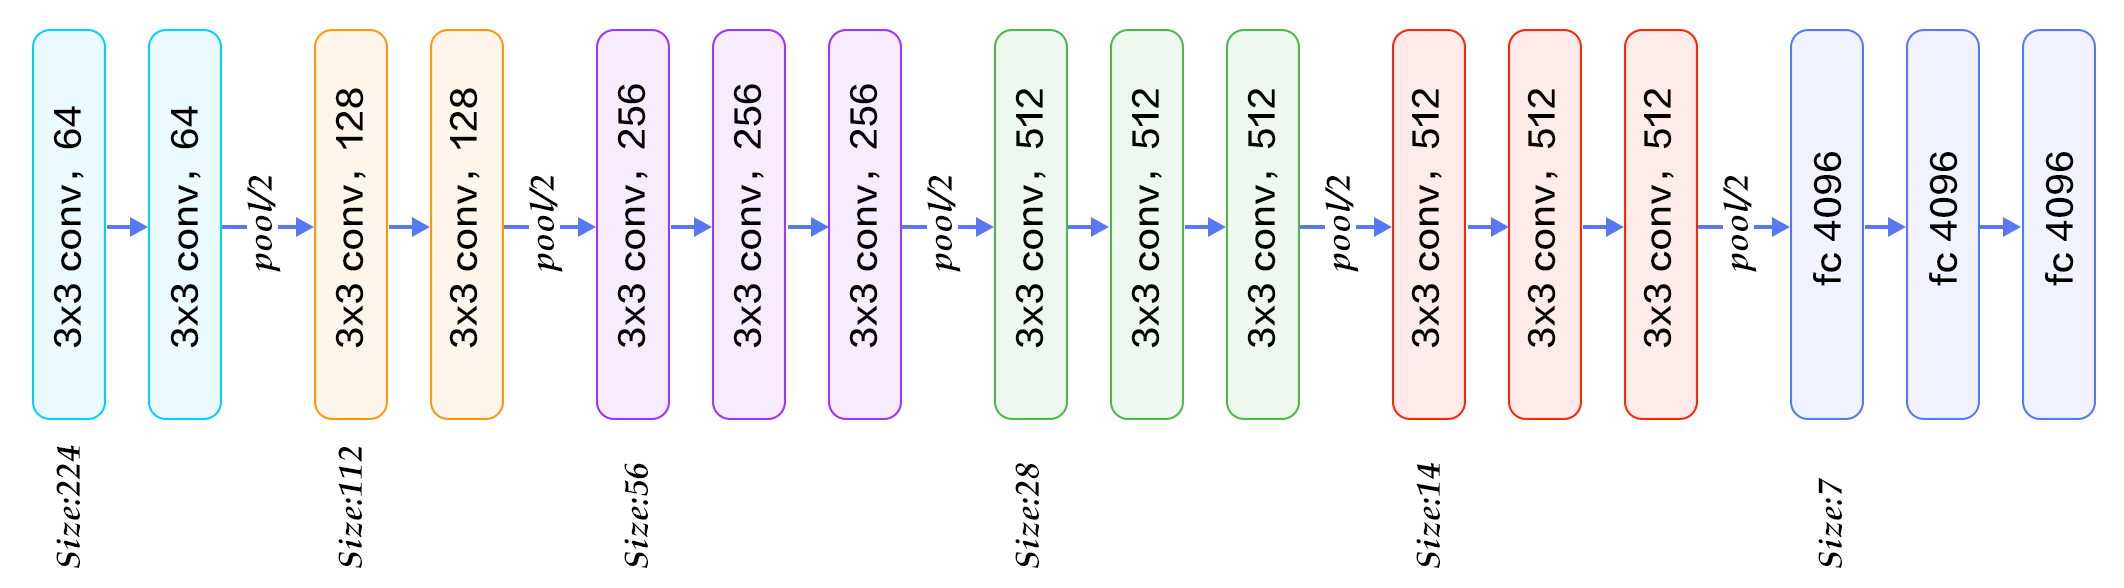

---

In [ ]:
def preprocess_images(image,label):
  image = tf.image.resize(image,(224,224))
  return image, label
train_ds = tf.data.Dataset.from_tensor_slices((X_train,Y_train)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,Y_valid)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)

In [ ]:
VGGNet = Sequential([
                     layers.Input((224,224,3))
])
for i in range(2):
  VGGNet.add(layers.Conv2D(64,3,1,padding="same",activation="relu",kernel_initializer="he_normal"))
VGGNet.add(layers.MaxPool2D(3,1,padding="same"))

for i in range(2):
  VGGNet.add(layers.Conv2D(128,3,1,padding="same",activation="relu",kernel_initializer="he_normal"))
VGGNet.add(layers.MaxPool2D(3,1,padding="same"))

for i in range(3):
  VGGNet.add(layers.Conv2D(256,3,1,padding="same",activation="relu",kernel_initializer="he_normal"))
VGGNet.add(layers.MaxPool2D(3,1,padding="same"))

for i in range(3):
  VGGNet.add(layers.Conv2D(512,3,1,padding="same",activation="relu",kernel_initializer="he_normal"))
VGGNet.add(layers.MaxPool2D(3,1,padding="same"))

for i in range(3):
  VGGNet.add(layers.Conv2D(512,3,1,padding="same",activation="relu",kernel_initializer="he_normal"))
VGGNet.add(layers.GlobalAveragePooling2D())

for i in range(2):
  VGGNet.add(layers.Dense(4096,activation="relu",kernel_initializer="he_normal"))
  VGGNet.add(layers.Dropout(0.5))

VGGNet.add(layers.Dense(10,activation="softmax"))


In [ ]:
VGGNet.compile(
    loss=sparse_categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
# VGGNet.fit(
#     train_ds,
#     validation_data=valid_ds,
#     epochs=50,
#     validation_freq=1,
#     callbacks=[keras.callbacks.EarlyStopping(patience=3)]
# )

#$ResNet$
> `Deep and Wide Connections`

---
$Kaiming$ $He$ $et$ $al$. won the $ILSVRC$ $2015$ challenge using a $Residual$ $Network$ (or $ResNet$), that delivered an `astounding top-five error rate` under $3.6$%. 

The `winning variant` used an `extremely deep CNN` composed of $152$ `layers` (other variants had $34$, $50$, and $101$ layers). 

It `confirmed` the `general trend` $:$ models are `getting deeper` and
`deeper`, with `fewer` and `fewer parameters`. The key to being able to `train` such a `deep network` is to use $skip$ $connections$ (also called $shortcut$ $connections$) $:$

* The `signal` feeding into a `layer` is also `added` to the `output` of a `layer` located a `bit higher up the stack`.

---
When you `initialize` a `regular neural network`, its `weights` are `close` to `zero`, so the `network` just `outputs` values close to `zero`. If you add a `skip connection`, the resulting `network` just `outputs` a `copy` of its `inputs`; in other words, it `initially models` the `identity function`. If the `target function` is `fairly close` to the `identity function` (which is often
the case), this will `speed up training considerably`.

Moreover, if you add many `skip connections`, the `network` can start making `progress` even if `several layers` have `not started learning` yet . Thanks to `skip connections`, the `signal` can easily make its way `across` the `whole network`. The `deep residual network` can be seen as a `stack` of `residual units` $(RUs)$, where each `residual unit` is a `small neural network` with a `skip connection`.

It is `surprisingly simple`. It `starts` and `ends` exactly `like` $GoogLeNet$ (except without a `dropout layer`), and in between is just a `very deep stack` of `simple residual units`. Each `residual unit` is composed of `two convolutional layers` (and `no pooling layer`!), with `Batch Normalization`
(BN) and `ReLU activation`, using $3 × 3$ `kernels` and preserving `spatial dimensions` (`stride` $1$, $"same"$ `padding`).

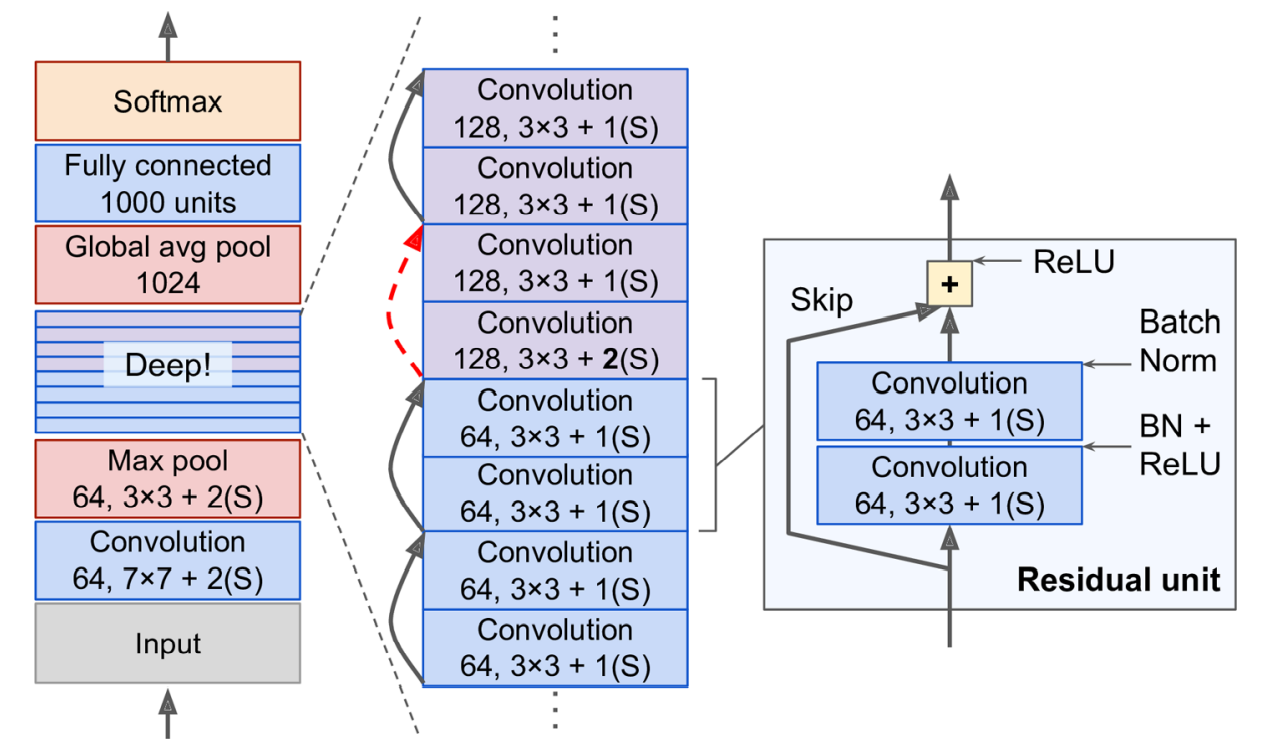



---

$Note$ that the `number` of `feature maps` is `doubled` every few `residual units`, at the same time as their `height` and `width` are `halved` (using a `convolutional layer` with `stride` $2$).

When this happens, the `inputs cannot` be `added` directly to the `outputs` of the `residual unit` because they `don’t have` the `same shape`. To solve this `problem`, the inputs are passed through a $1 × 1$ `convolutional layer` with `stride` $2$ and the `right number` of `output feature maps`.

---
$Important$ $:$

* This shows the `effectiveness` of `shortcut connections`.


---


In [ ]:
def preprocess_images(image,label):
  image = tf.image.resize(image,(224,224))
  return image, label
train_ds = tf.data.Dataset.from_tensor_slices((X_train,Y_train)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,Y_valid)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)

In [ ]:
def ResidualBlock(input_layer,n_units,stride):
  path_1_1 = layers.Conv2D(n_units,3,stride,padding="same",activation="relu",kernel_initializer="he_normal")(input_layer)
  path_1_ = layers.BatchNormalization()(path_1_1)
  path_1_2 = layers.Conv2D(n_units,3,1,padding="same")(path_1_)
  path_1_2_ = layers.BatchNormalization()(path_1_2)

  
  path_2_1 = layers.Conv2D(n_units,3,stride,padding="same")(input_layer)
  path_2_2 = layers.BatchNormalization()(path_2_1)

  Output = layers.Concatenate(axis=3)([path_1_2_,path_2_2])
  return Output

In [ ]:
InputLayer = layers.Input((224,224,3))
conv1 = layers.Conv2D(64,7,2,activation="relu",kernel_initializer="he_normal")(InputLayer)
pool_1 = layers.MaxPool2D(3,2,padding="same")(InputLayer)

ru_1 = ResidualBlock(pool_1,64,1)
ru_2 = ResidualBlock(ru_1,64,1)
ru_3 = ResidualBlock(ru_2,64,1)

ru_4 = ResidualBlock(ru_3,128,2)
ru_5 = ResidualBlock(ru_4,128,1)
ru_6 = ResidualBlock(ru_5,128,1)
ru_7 = ResidualBlock(ru_6,128,1)

ru_8 = ResidualBlock(ru_7,256,2)
ru_9 = ResidualBlock(ru_8,256,1)
ru_10 = ResidualBlock(ru_9,256,1)
ru_11 = ResidualBlock(ru_10,256,1)
ru_12 = ResidualBlock(ru_11,256,1)
ru_13 = ResidualBlock(ru_12,256,1)


ru_14 = ResidualBlock(ru_13,512,2)
ru_15 = ResidualBlock(ru_14,512,1)
ru_16 = ResidualBlock(ru_15,512,1)

GAP = layers.GlobalAveragePooling2D()(ru_16)
OutputLayer = layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal")(GAP)

ResNet = keras.Model(
    inputs=[InputLayer],
    outputs=[OutputLayer]
)
ResNet.compile(
    loss=sparse_categorical_crossentropy,
    optimizer='adam',
    metrics=["accuracy"]
)

In [ ]:
# ResNet.fit(
#     train_ds,
#     validation_data=valid_ds,
#     validation_freq = 1,
#     epochs=50,
#     callbacks=[keras.callbacks.EarlyStopping(patience=3)]
# )

#$Xception$

> `Extreme Inception without InceptionModules!`

---
Another `variant` of the $GoogLeNet$ `architecture` is `worth noting` $:$ $Xception$ (which stands for `Extreme Inception`) was `proposed` in $2016$ by $François Chollet$ (the `author` of $Keras$), and it significantly `outperformed` $Inception$-$v3$ on a `huge vision task` (350 `million` images and $17,000$ `classes`). Just like $Inception$-$v4$, it `merges` the `ideas` of $GoogLeNet$ and $ResNet$, but it `replaces` the `inception modules` with a `special type` of layer called a `depthwise separable convolution layer` (or `separable convolution layer` for short).

It is `composed` of `two parts` $:$ 

* The `first part` applies a `single spatial filter` for each `input feature map`.

* The `second part` looks exclusively for `cross-channel patterns` it is just a `regular convolutional layer` with $1 × 1$ `filters`.

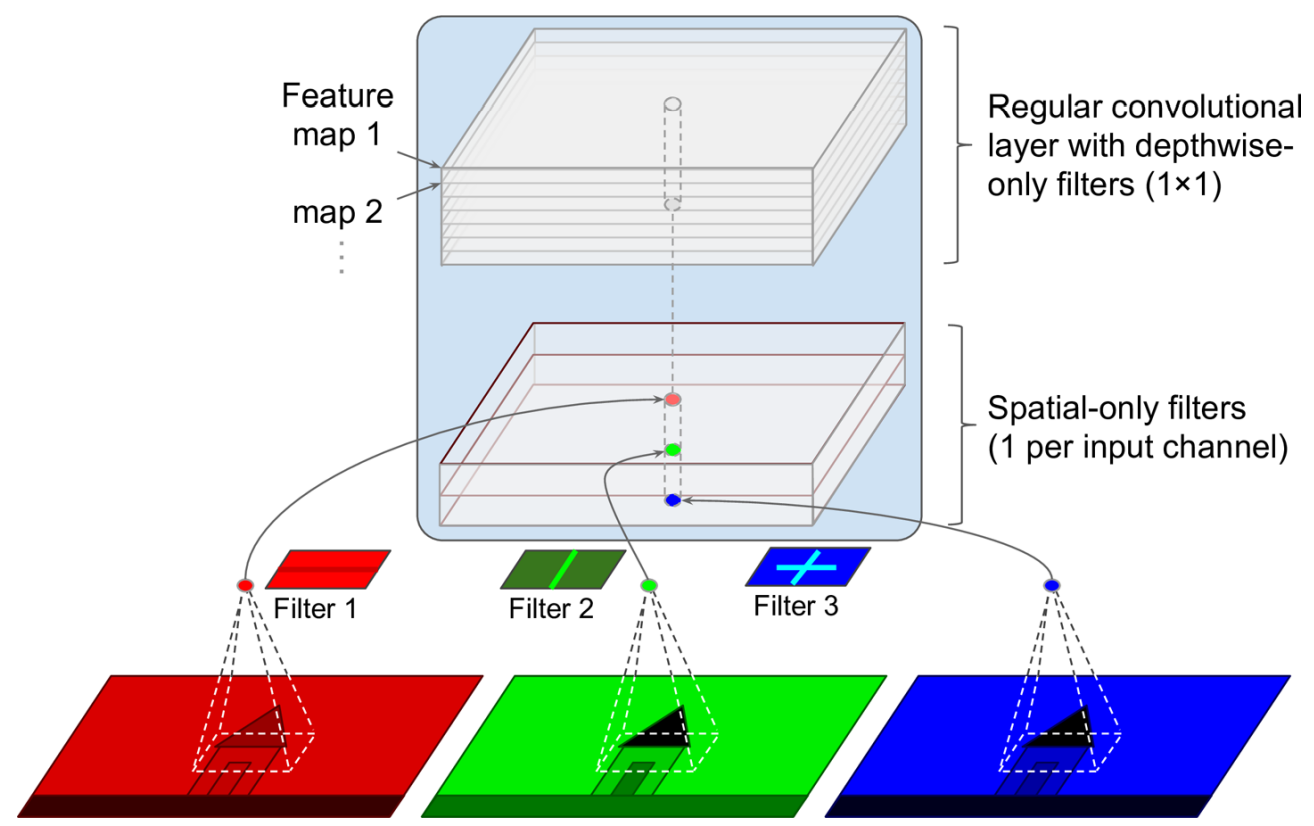





The $Xception$ `architecture` starts with $2$ regular `convolutional layers`, but then the `rest` of the `architecture` uses only `separable convolutions` ($34$ in all), plus a `few max pooling layers` and the usual `final layers` (a `global average pooling` layer and a `dense output` layer).

In practice, it seems that `separable convolutional layers` generally `perform better`. `Separable convolutional layers` use `fewer parameters`, `less memory`,
and `fewer computations` than regular convolutional layers, and in
general they even `perform better`, so you should consider using
them by `default` (except after layers with `few channels`).

---
$NOTE :$

* This showed us that `Separable convolutional layers` are `better` than normal `convolutional layers` and we can use them as `default layers` exept in the `starting`.



---

#$SENet$

>  `Extending and Grouping`

----
The `winning architecture` in the $ILSVRC$ $2017$ challenge was the $Squeeze$-$and$-$Excitation$ $Network$ $(SENet)$. This `architecture` extends existing `architectures` such as `inception networks` and `ResNets`, and `boosts` their `performance`. This allowed $SENet$ to win the `competition` with an `astonishing` $2.25$% `top-five error rate`! 

The `extended versions` of inception networks and ResNets are called $SE$-$Inception$ and $SE$-$ResNet$, respectively. The `boost` comes from the fact that a $SENet$ adds a `small neural network`, called an $SE$ $block$, to `every unit` in the `original architecture` (i.e., every `inception module` or every `residual unit`).

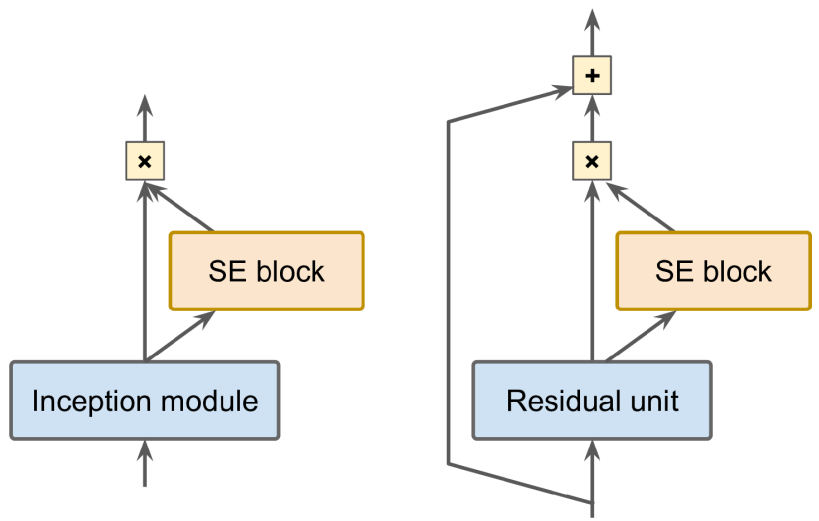

---

---
An $SE$ $block$ analyzes the `output` of the `unit` it is `attached` to, `focusing exclusively` on the `depth dimension` (it does not look for any spatial pattern), and it learns which `features` are `usually most active` together. It then uses this `information` to `recalibrate` the `feature maps`.


* More accurately, it will `reduce irrelevant feature` maps.

* If the `features` were somewhat `confused` with `something else`, this `feature map recalibration` will help `resolve` the `ambiguity`.

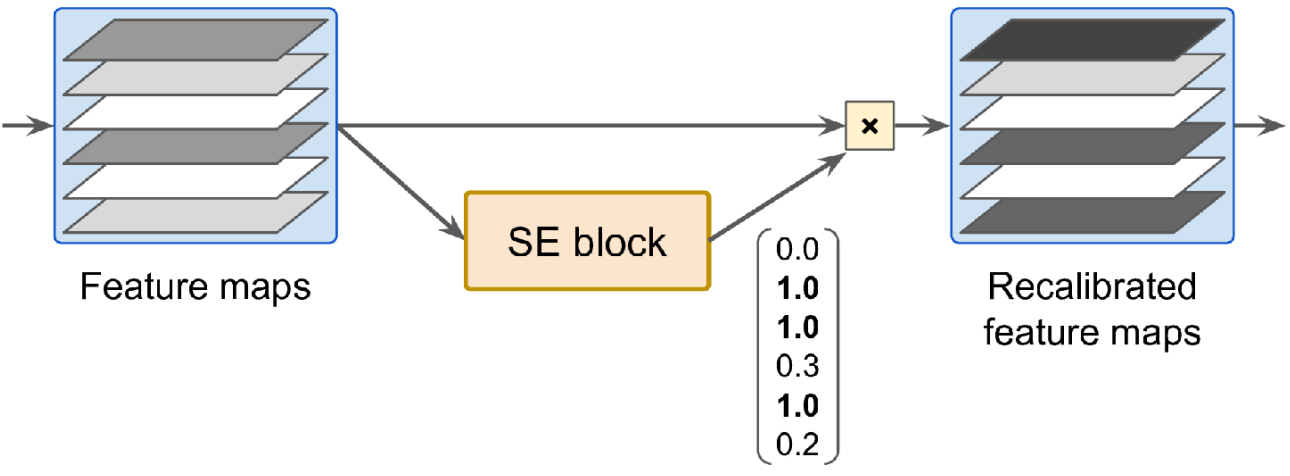

---

---
$SE$ $Block$ $:$

* An $SE$ $block$ is composed of just `three layers` $:$ a `global average pooling layer`, a `hidden dense layer` using the `ReLU activation` function, and a `dense output layer` using the
`sigmoid activation` function.

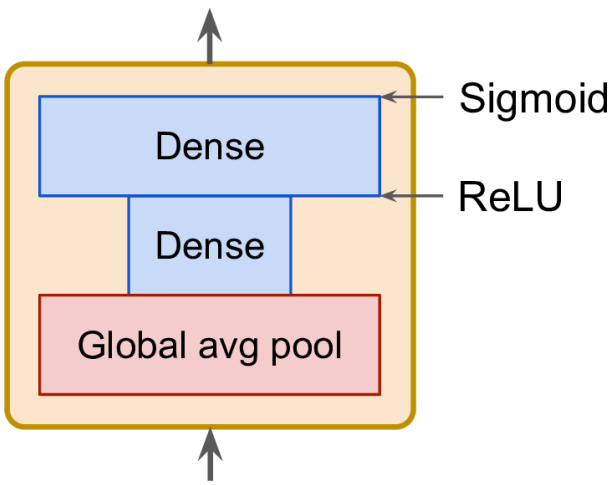

> As earlier, the `global average pooling layer` computes the `mean activation` for each `feature map`.

> The `next layer` is where the $“squeeze”$ happens $:$ this `layer` has `significantly fewer` than `input feature maps`(example, $256$) typically $16$ `times fewer` than the number of `feature maps` (e.g., $16$ `neurons`)so the
$256$ `numbers` get `compressed` into a `small vector` (e.g., $16$ `dimensions`). 
> This is a `low-dimensional vector representation` (i.e., an `embedding`) of the `distribution` of `feature responses`. This $bottleneck$ $step$ forces the $SE$ $block$ to learn a `general representation` of the `feature combinations`.

> Finally, the `output layer` takes the `embedding` and outputs a `recalibration vector` containing `one number per feature map` (e.g., 256), each between $0$ and $1$.

> The `feature maps` are then `multiplied` by this `recalibration vector`, so `irrelevant features` (with a `low recalibration score`) get `scaled down` while `relevant features` (with a `recalibration score` close to $1$) are `left alone`.



---

In [15]:
def SEBlock(input_layer,squeez_units,decoding_units):
  GAP = layers.GlobalAveragePooling2D()(input_layer)
  squeez_layer = layers.Dense(squeez_units,activation="relu")(GAP)
  decode_layer = layers.Dense(decoding_units,activation="softmax")(squeez_layer)
  return decode_layer
def ResidualBlock(input_layer,n_units,stride):
  path_1_1 = layers.Conv2D(n_units,3,stride,padding="same",activation="relu",kernel_initializer="he_normal")(input_layer)
  path_1_ = layers.BatchNormalization()(path_1_1)
  path_1_2 = layers.Conv2D(n_units,3,1,padding="same")(path_1_)
  path_1_2_ = layers.BatchNormalization()(path_1_2)

  
  path_2_1 = layers.Conv2D(n_units,3,stride,padding="same")(input_layer)
  path_2_2 = layers.BatchNormalization()(path_2_1)

  Output = layers.Concatenate(axis=3)([path_1_2_,path_2_2])
  return Output

InputLayer = layers.Input((224,224,3))
conv1 = layers.Conv2D(64,7,2,activation="relu",kernel_initializer="he_normal")(InputLayer)
pool_1 = layers.MaxPool2D(3,2,padding="same")(InputLayer)

ru_1 = ResidualBlock(pool_1,64,2)
se_1 = SEBlock(ru_1,4,64)
se_ru_matmul_1 = tf.matmul(ru_1,se_1)

ru_2 = ResidualBlock(se_ru_matmul_1,64,1)
se_2 = SEBlock(ru_2,4,64)
se_ru_matmul_2 = tf.matmul(ru_2,se_2)


ru_3 = ResidualBlock(se_ru_matmul_2,64,1)
se_3 = SEBlock(ru_3,4,64)
se_ru_matmul_3 = tf.matmul(ru_3,se_3)


ru_4 = ResidualBlock(se_ru_matmul_3,128,2)
se_4 = SEBlock(ru_4,8,128)
se_ru_matmul_4 = tf.matmul(ru_4,se_4)


ru_5 = ResidualBlock(se_ru_matmul_4,128,1)
se_5 = SEBlock(ru_5,8,128)
se_ru_matmul_5 = tf.matmul(ru_5,se_5)


ru_6 = ResidualBlock(se_ru_matmul_5,128,1)
se_6 = SEBlock(ru_6,8,128)
se_ru_matmul_6 = tf.matmul(ru_6,se_6)


ru_7 = ResidualBlock(se_ru_matmul_6,256,2)
se_7 = SEBlock(ru_7,16,256)
se_ru_matmul_7 = tf.matmul(ru_7,se_7)


ru_8 = ResidualBlock(se_ru_matmul_7,256,1)
se_8 = SEBlock(ru_8,16,256)
se_ru_matmul_8 = tf.matmul(ru_8,se_8)


GAP = layers.GlobalAveragePooling2D()(se_ru_matmul_8)
OutputLayer = layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal")(GAP)

SENet = keras.Model(
    inputs=[InputLayer],
    outputs=[OutputLayer]
)
SENet.compile(
    loss=sparse_categorical_crossentropy,
    optimizer='adam',
    metrics=["accuracy"]
)

In [16]:
def preprocess_images(image,label):
  image = tf.image.resize(image,(224,224))
  return image, label
train_ds = tf.data.Dataset.from_tensor_slices((X_train,Y_train)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,Y_valid)).map(preprocess_images).shuffle(10000).batch(64,drop_remainder=True).prefetch(1)

In [18]:
# SENet.fit(
#     train_ds,
#     validation_data=valid_ds,
#     validation_freq = 1,
#     epochs=50,
#     callbacks=[keras.callbacks.EarlyStopping(patience=3)]
# )